In [8]:
import os
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots

In [2]:
gama = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold.fits')
gama

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877282934995,38.987333957322036
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.8389164013717,38.05776114275112
919107,588848899914203331,183.48960919,-0.18662595,20.020039,-1.0,0,xxx,1,21.41414,20.356668,20.068037,19.943966,19.805355,-0.0,-inf
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.490417599368,38.928394257732286
585597,588848899914203421,183.45941744,-0.14743476,19.627613,0.43697,4,G12_Y1_GD1_015,5,21.248838,20.511686,19.509012,19.120184,18.97181,1715.1279804344379,41.171482660152606
919116,588848899914203440,183.52976588,-0.13046733,20.035206,-1.0,0,xxx,1,24.448362,21.581064,19.873873,19.16066,18.78938,-0.0,-inf
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.1713344398985,38.02205556081336
585601,588848899914203457,183.4293652,-0.05253383,19.350739,0.02031,3,G12_Y1_GN1_024,6,20.477499,19.578978,19.268719,19.187151,19.26956,61.88647122635883,33.957978599389754


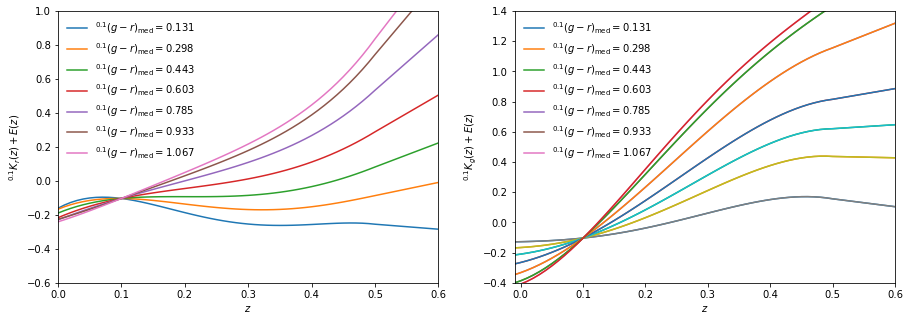

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_plots(axes)

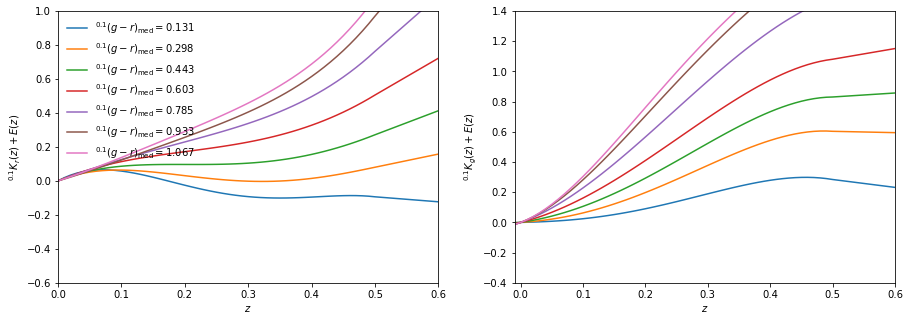

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

test_nonnative_plots(axes, 0.0)

In [21]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,mag,,,,mag,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877282934995,38.987333957322036,1.0760765,0.8610029493925443,0,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801,-19.579818745069403,-19.61099844139089
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.8389164013717,38.05776114275112,0.7318821,0.6893753080282159,0,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948,-20.47429997270383,-20.331366484811678
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.490417599368,38.928394257732286,1.2004261,0.9721022317088284,0,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001,-20.552184290823455,-20.58261429482412
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.1713344398985,38.02205556081336,0.41841125,0.3893481424147275,0,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304,-18.64839876909969,-18.50761577208755
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.0727138334535,37.282382179681775,0.24911118,0.25921542614595333,0,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678,-17.82980751708629,-17.72729653582456
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514195181614,39.00616564065057,0.46534348,0.3271754608358587,0,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075,-20.260495557044862,-20.047929598544954
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085935085259,39.72440771564458,1.4639511,1.0187620089417166,0,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128,-21.875563041037772,-21.917665243810866
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851069628382,39.25746923998126,0.8774986,0.6616306307163672,0,-0.027243027797297995,0.1886249681953192,0.1935241661150005,0.4755138903473121,0.5955089024766728,2.12,-0.1987821,-0.43445155,-20.386854859510226,-20.151185410538478


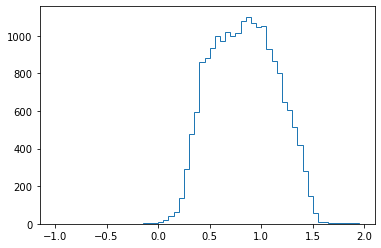

In [22]:
_ = pl.hist(gama_kE['GMR'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

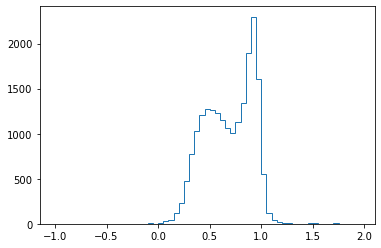

In [23]:
_ = pl.hist(gama_kE['REST_GMR_0P1'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

In [24]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

array([0, 1, 2])

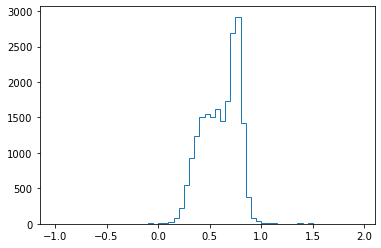

In [25]:
_ = pl.hist(gama_kE['REST_GMR_0P0'], histtype='step', bins=np.arange(-1.0, 2.0, 0.05))

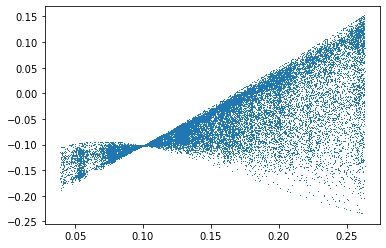

In [26]:
pl.plot(gama_kE['ZGAMA'], gama_kE['KCORR_R0P1'], marker=',', lw=0.0)

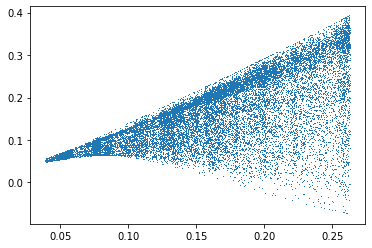

In [27]:
pl.plot(gama_kE['ZGAMA'], gama_kE['KCORR_R0P0'], marker=',', lw=0.0)

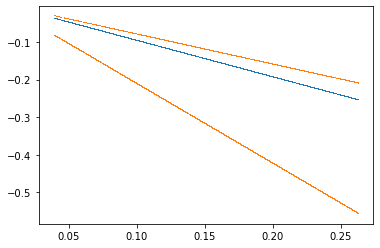

In [28]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0)
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0)

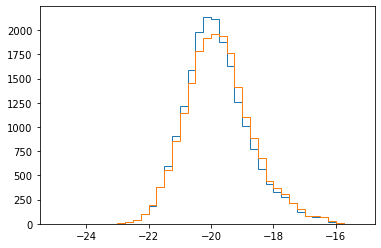

In [33]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25))
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-25., -15.0, 0.25))

In [34]:
os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE.fits'

'/global/cscratch1/sd/mjwilson/norberg//GAMA4/gama_gold_kE.fits'

In [38]:
! ls -lt /global/cscratch1/sd/mjwilson/norberg//GAMA4/

total 80772
-rw-rw---- 1 mjwilson mjwilson  1042560 Dec 14 07:31 gama_gold_kE_5k.fits
-rw-rw---- 1 mjwilson mjwilson 12407040 Dec 14 07:27 gama_gold.fits
-rw-rw---- 1 mjwilson mjwilson  3960000 Dec 14 07:17 gama_gold_kE.fits
-rw-rw---- 1 mjwilson mjwilson 34243200 Nov 25 05:13 bright_v0.0.fits
-rw-rw---- 1 mjwilson mjwilson 31046400 Nov 25 05:13 bright_reachable_v0.0.fits


# Done.